
# Project: Investigate Medical Appointment No Shows Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>    
</ul>

<a id='intro'></a>
## Introduction



This <a href="https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv">dataset</a> provides information about 100k plus patients attendance of their medical appointment in Brazil. It contains a variable that states whether the patient came for their appointment or not. Other variables or features as described on the dataset <a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments?resource=download">website</a> are listed below;

Data Dictionary
1. PatientId- Identification of a patient
2. AppointmentID- Identification of each appointment
3. Gender- Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
4. DataMarcacaoConsulta- The day of the actuall appointment, when they have to visit the doctor.
5. DataAgendamento- The day someone called or registered the appointment, this is before appointment of course.
6. Age- How old is the patient.
7. Neighbourhood- Where the appointment takes place.
8. Scholarship- True of False more information about it can be found <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia">here</a>
9. Hipertension- True or False
10. Diabetes- True or False
11. Alcoholism- True or False
12. Handcap- True or False
13. SMS_received- 1 or more messages sent to the patient.
14. No-show- True or False.


This dataset will be useful to understand the factors reponsible for a patient absence. It will also be useful to predict whether a patient will show up on their appointed day.
A few questions to ask based on this dataset are;
<ul>
<li> Which gender is most likely to attend their appointment?
<li> Which age group attends their appointments the most?

<li> How does the patient income status affects their appointment. The scholarship, Bolsa Familia, is a poverty alleviation scheme in Brazil. We could attribute scholarship recipients to people from low income families. Therefore, this could assist us to answer the question.
<li> How well do people with disabilities attend their appointment?
<li> Is SMS an effective reminder?

In [2]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [5]:
# Load dataset 
dataset_url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv'
df= pd.read_csv(dataset_url)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape

(110527, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# checking dataset for missing values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

> There is no missing value in any of the columns

In [10]:
# checking dataset for duplicates
sum(df.duplicated())

0

> There is no duplicated row in the dataset

In [11]:
#checking the number of unique values in each columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> Based on the data description, the number of unique values in the handcap featues ought to be 2. however, 5 is present. Therefore, this requires some investigations

### Data Cleaning 

#### Dropping some columns

Some columns have too many unique values and may not be useful in our analysis. Therefore, they are to be deleted. This columns are; PatientId, AppointmentID, and ScheduledDay. For Patient ID, I am still trying to understand why there are much fewer unique values than the sample size

In [12]:
# columns to be dropped are PatientId, AppointmentID, and ScheduledDay
cols_drop= ['PatientId', 'AppointmentID', 'ScheduledDay']
df.drop(cols_drop, axis=1, inplace= True)
df.head(3)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


#### Renaming Column

In [13]:
# rename the target column
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [14]:
df.columns

Index(['Gender', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No_show'],
      dtype='object')

#### Incorrect Data

In [15]:
# Getting the unique values in handcap
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [16]:
df['Handcap']=df['Handcap'].map({0:0,1:1, 2:2, 3:2, 4:2})

In [17]:
df.Handcap.value_counts()

0    108286
1      2042
2       199
Name: Handcap, dtype: int64

> The other incorrectly recorded data in the handicap column was mapped to a value of 2

In [18]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis


#### Research Question 1 - Which gender is most likely to attend their appointment? 

<AxesSubplot:xlabel='Gender', ylabel='count'>

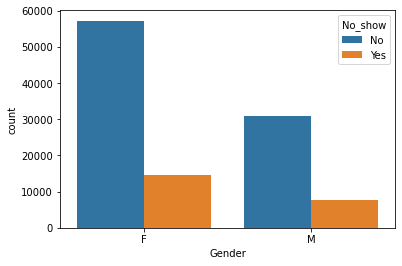

In [19]:
sns.countplot(x ='Gender', data = df, hue ='No_show')

In [20]:
# working with proportions might share some insights about the plot 
# getting the total number of female
def proportions (col, col_true, df,target):
    
    '''
    This function returns the proportion of the true values in the column specified
    
    Parameters
    -----------------
    col is the column to be estimated
    col_true is the truth value in the column 
    df is the dataframe
    target is the dependent feature
    
    '''
    true =df[df[col] == col_true] 
    total_t= true[col].count()

    # getting the number of those that did not show up on their appointment
    non_attendee_t= true [true [target] == 'Yes']
    miss_t=non_attendee_t[target].count()
    miss_t
    # proportion of those that did not show up on their appointment

    prop_t= round ((miss_t/total_t) * 100, 2)
    return prop_t

In [21]:
# proportion of female that did not show up on their appointment
print(f" The proportion of females that did not show up is {proportions('Gender','F', df,'No_show')} %" )

 The proportion of female that did not show up is 20.31 %


In [22]:
# proportion of male that did not show up on their appointment
print(f" The proportion of males that did not show up is {proportions('Gender','M', df,'No_show')} %" )

 The proportion of males that did not show up is 19.97 %


> The proportion of female that missed their appointment is greater than that of male

#### Research Question 2 - Which age group attend their appointments the most? 

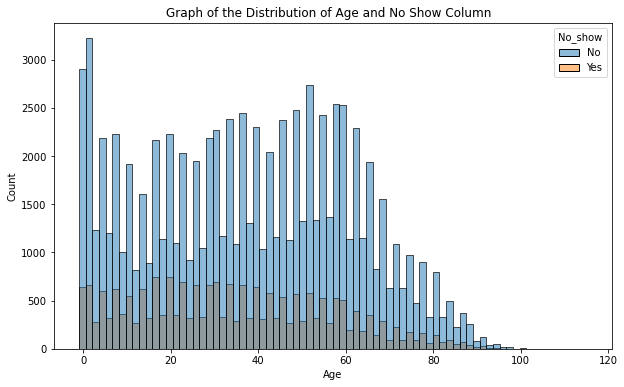

In [58]:
# Does age has any relationship with attending appointment?
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(ax=ax, data=df, x='Age',  hue='No_show')
plt.title('Graph of the Distribution of Age and No Show Column  ')
plt.show()

In [24]:
df.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In [25]:
# creating a new list for each age group
AgeGroup=[]
for x in df.Age:
    if x < 18:
        x = 'child'
    elif x >18 and x< 60:
        x = 'adult'
    else:
        x = 'old'
    AgeGroup.append(x)
print(AgeGroup[0:10])
    

['old', 'adult', 'old', 'child', 'adult', 'old', 'adult', 'adult', 'adult', 'adult']


In [26]:
# creating a new column of age group in the dataframe
df['Age_Group']=AgeGroup
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_Group
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,old
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adult
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,old
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,adult


In [27]:
df['Age_Group'].value_counts()

adult    60487
child    27380
old      22660
Name: Age_Group, dtype: int64

In [28]:
df.groupby(['No_show', 'Age_Group']).count()

Gender  AppointmentDay    Age  Neighbourhood  Scholarship  \
No_show Age_Group                                                              
No      adult       47757           47757  47757          47757        47757   
        child       21383           21383  21383          21383        21383   
        old         19068           19068  19068          19068        19068   
Yes     adult       12730           12730  12730          12730        12730   
        child        5997            5997   5997           5997         5997   
        old          3592            3592   3592           3592         3592   

                   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  
No_show Age_Group                                                             
No      adult             47757     47757       47757    47757         47757  
        child             21383     21383       21383    21383         21383  
        old               19068     19068       19068    19068         19068  
Yes     adult             12730     12730       12730    12730         12730  
        child              5997      5997        5997     5997          5997  
        old                3592      3592        3592     3592          3592

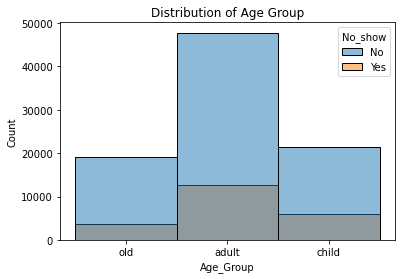

In [60]:
sns.histplot(data=df, x="Age_Group", hue='No_show')
plt.title('Distribution of Age Group');

In [30]:
df.loc[(df["Age_Group"] == 'old'),'No_show'].count()

22660

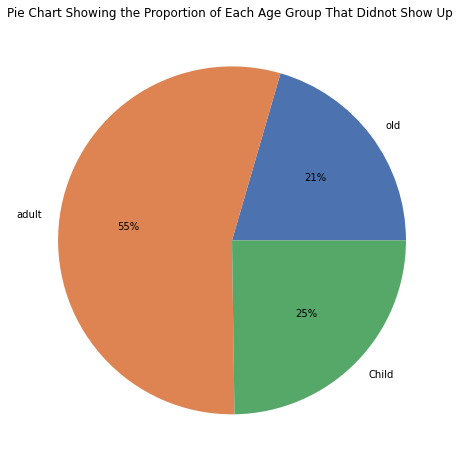

In [61]:
# getting the proportion of each Age Groups in the dataset
total_count= [df.loc[(df["Age_Group"] == 'old'),'No_show'].count(), df.loc[(df["Age_Group"] == 'adult'),'No_show'].count(),
               df.loc[(df["Age_Group"] == 'child'),'No_show'].count()]

category= ['old', 'adult', 'Child']

# Seaborn color palette to plot pie chart
colors = sns.color_palette('deep')

# creating pie chart using matplotlib
plt.figure(figsize=(10,8))
plt.pie(total_count, labels=category, colors=colors, autopct='%.0f%%')
plt.title('Pie Chart Showing the Proportion of Each Age Group That Didnot Show Up ')
plt.show()


In [32]:
# proportion of old people that did not show up on their appointment
print(f" The proportion of old people that did not show up is {proportions('Age_Group','old', df,'No_show')} %" )

 The proportion of old people that did not show up is 15.85 %


In [33]:
# proportion of adults that did not show up on their appointment
print(f" The proportion of adults that did not show up is {proportions('Age_Group','adult', df,'No_show')} %" )

 The proportion of adults that did not show up is 21.05 %


In [34]:
# proportion of children that did not show up on their appointment
print(f" The proportion of children that did not show up is {proportions('Age_Group','child', df,'No_show')} %" )

 The proportion of children that did not show up is 21.9 %


In [35]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [36]:
truef =df[df['Gender'] == 'F'] 
total_f= truef['Gender'].count()

    # getting the number of those that did not show up on their appointment
non_attendee_f= truef [(truef ["No_show"] == 'Yes') & (truef ["Age_Group"] == 'adult')]
miss_f=non_attendee_f["No_show"].count()
miss_f
    # proportion of those that did not show up on their appointment

prop_f= round ((miss_f/total_f) * 100, 2)
print(f" The proportion of femele adult that did not show up is {prop_f} %" )

 The proportion of femele adult that did not show up is 12.59 %


In [37]:
truef =df[df['Gender'] == 'F'] 
total_f= truef['Gender'].count()

    # getting the number of those that did not show up on their appointment
attendee_f= truef [(truef ["No_show"] == 'No') & (truef ["Age_Group"] == 'adult')]
nomiss_f=attendee_f["No_show"].count()
nomiss_f
    # proportion of those that did not show up on their appointment

prop_fno= round ((nomiss_f/total_f) * 100, 2)
print(f" The proportion of femele adult that did show up is {prop_fno} %" )

 The proportion of femele adult that did show up is 46.71 %


> Eventhough there is a larger number of Adults in the age groups, more children did not show on their appointment date

### Research Question 3:  How does the patient income status affects their appointment?

In [38]:
print(df.groupby(['Scholarship'])['No_show'].value_counts())

Scholarship  No_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: No_show, dtype: int64


Text(0.5, 1.0, 'The Barplot of the Scholarship Column')

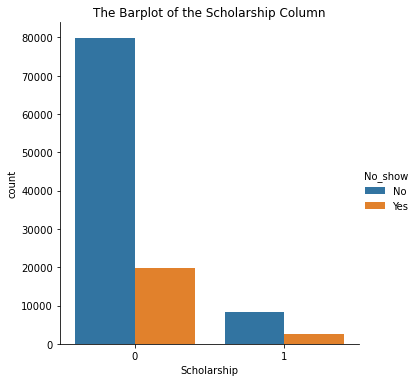

In [62]:
sns.catplot( x='Scholarship', hue='No_show', kind= 'count', data=df)
plt.title('The Barplot of the Scholarship Column')

In [40]:
# proportion of scholarship recipient that did not show up on their appointment
print(f" The proportion of scholarship receipients that did not show up is {proportions('Scholarship',1, df,'No_show')} %" )

 The proportion of scholarship receipients that did not show up is 23.74 %


In [41]:
# proportion of no scholarship recipient that did not show up on their appointment
print(f" The proportion of non-receipients of scholarship that did not show up is {proportions('Scholarship',0, df,'No_show')} %" )

 The proportion of non-receipients of scholarship that did not show up is 19.81 %


> It could be observed that a significant proportion of low income patients couldnt show up on their appointment date

### Research Question 4:  How well do people with disabilities attends their appointment?


In [42]:
print(df.groupby(['Handcap'])['No_show'].value_counts())

Handcap  No_show
0        No         86374
         Yes        21912
1        No          1676
         Yes          366
2        No           158
         Yes           41
Name: No_show, dtype: int64


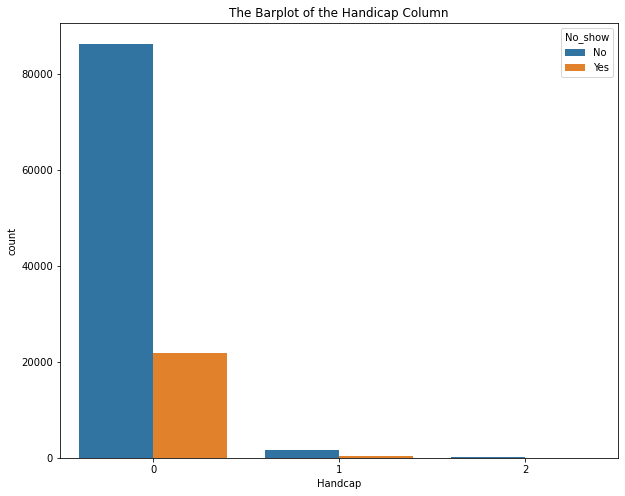

In [43]:
plt.figure(figsize=(10,8))
sns.countplot(x='Handcap', hue='No_show', data=df)
plt.title('The Barplot of the Handicap Column')
plt.show()

In [45]:
# proportion of people with disabilities that did not show up on their appointment
print(f" The proportion of people with disabilities that did not show up is {proportions('Handcap',1, df,'No_show')} %" )

 The proportion of people with disabilities that did not show up is 17.92 %


In [46]:
# proportion of people without disabilities that did not show up on their appointment
print(f" The proportion of people without disabilities that did not show up is {proportions('Handcap',0, df,'No_show')} %" )

 The proportion of people without disabilities that did not show up is 20.24 %


In [47]:
# proportion of the other that did not show up on their appointment
print(f" The proportion of the other group that did not show up is {proportions('Handcap',1, df,'No_show')} %" )

 The proportion of the other group that did not show up is 17.92 %


> It appears that people with disabilities show up on their appointment the most

### Research Question 5:  Is SMS an effective reminder?

In [48]:
print(df.groupby(['SMS_received'])['No_show'].value_counts())


SMS_received  No_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No_show, dtype: int64


Text(0.5, 1.0, 'The Barplot of the SMS Reminder Column')

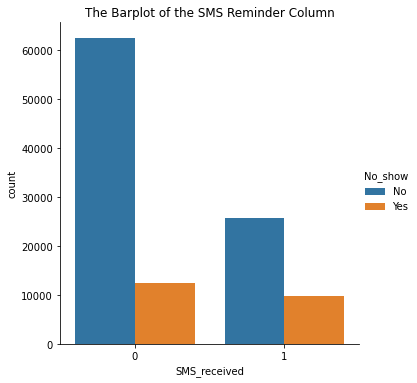

In [63]:
sns.catplot( x='SMS_received', hue='No_show', kind= 'count', data=df)
plt.title('The Barplot of the SMS Reminder Column')

In [64]:
# proportion of people that received more than one SMS and still did not show up on their appointment
print(f" The proportion of people that received more than one SMS and still did not show up is {proportions('SMS_received', 1, df,'No_show')} %" )

 The proportion of people that received more than one SMS and still did not show up is 27.57 %


In [65]:
# proportion of people that didnot received any SMS and did not show up on their appointment
print(f" The proportion of people that received more than one SMS and still did not show up is {proportions('SMS_received', 0, df,'No_show')} %" )

 The proportion of people that received more than one SMS and still did not show up is 16.7 %


> From the plot and proportion estimate, larger number of people that received one or more SMS messages did not still show up

In [66]:
#getting correlation among the features
df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.079392,0.012643
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008382,0.001194
Hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.081905,-0.006267
Diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.058857,-0.014550
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.003926,-0.026147
Handcap,0.079392,-0.008382,0.081905,0.058857,0.003926,1.000000,-0.024457
SMS_received,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024457,1.000000


> There is strong positive correlation between age and patients with hypertension and diabetes

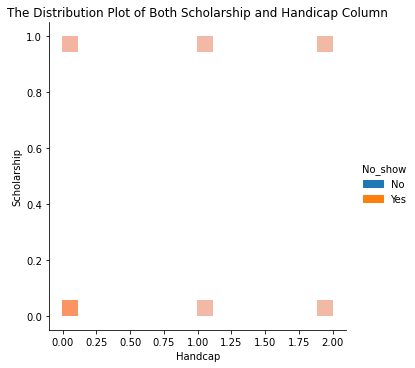

In [69]:
sns.displot(df, x="Handcap", y="Scholarship", hue='No_show')
plt.title('The Distribution Plot of Both Scholarship and Handicap Column');

<Figure size 720x576 with 0 Axes>

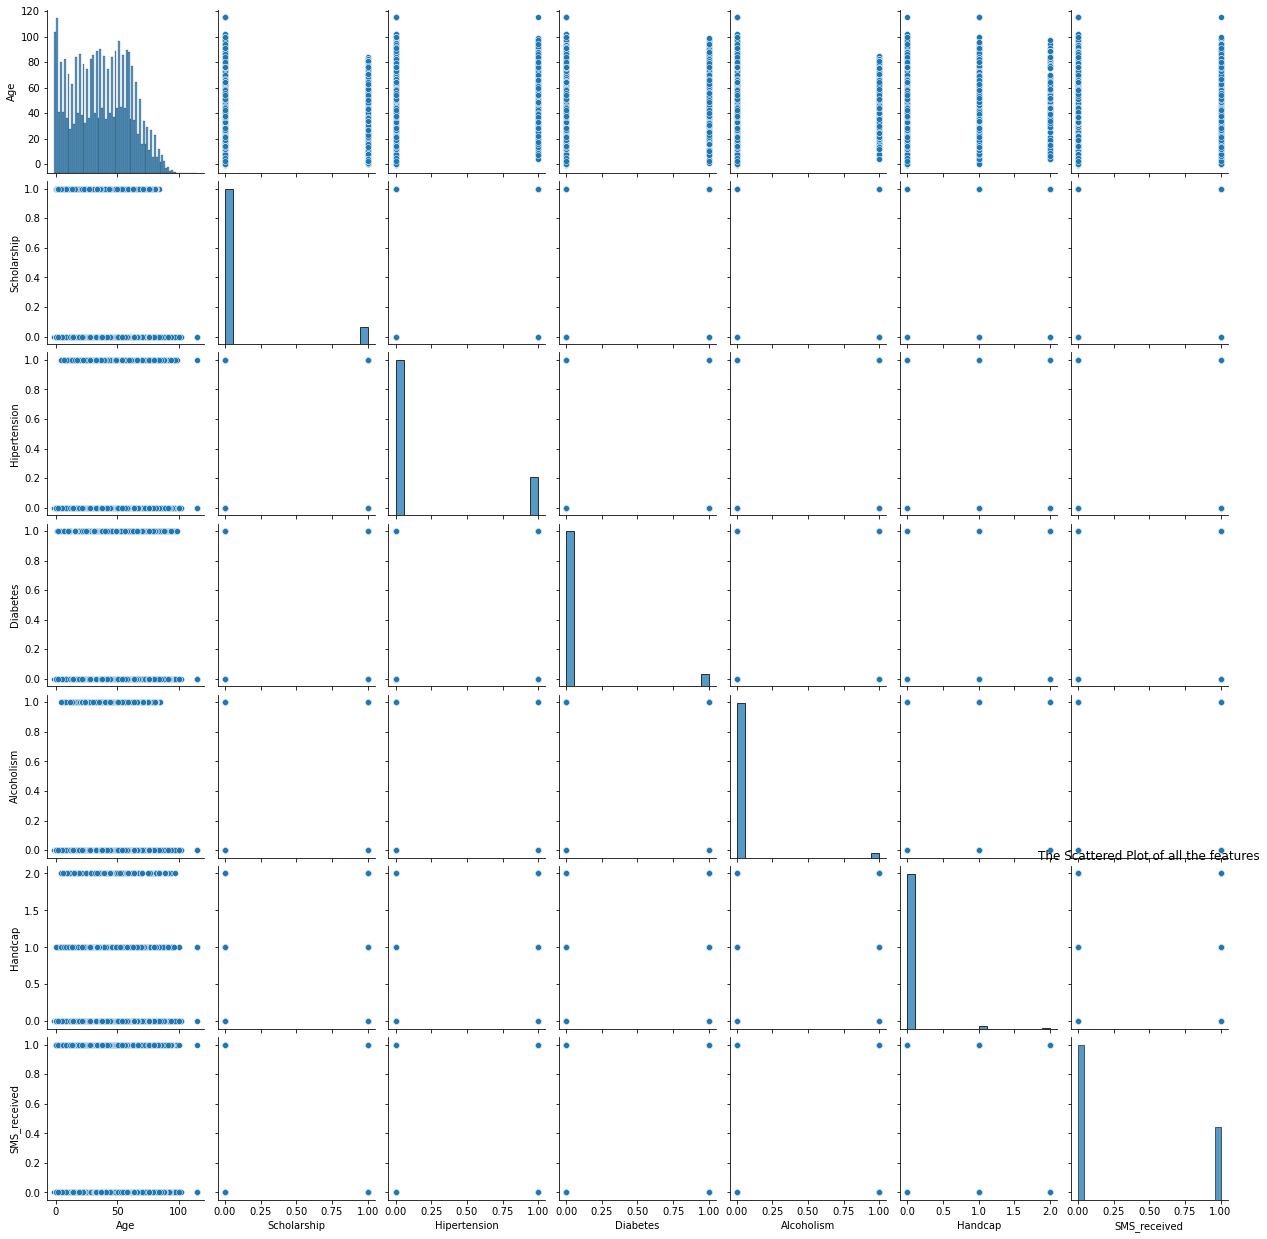

In [73]:
# getting relationship between the features
plt.figure(figsize=(10,8));
sns.pairplot(df);
plt.title('The Scattered Plot of all the features');
plt.show();

In [55]:
df.columns

Index(['Gender', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No_show', 'Age_Group'],
      dtype='object')

In [56]:
num_df=df.loc[:, [ 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       ]]

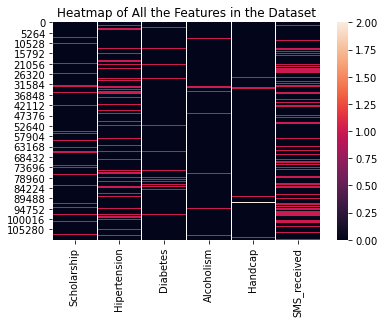

In [75]:
sns.heatmap(num_df)
plt.title('Heatmap of All the Features in the Dataset');

> Not much of an can be gained from these plots since they are categorical data

<a id='conclusions'></a> 
## Conclusions

Each of the features has a way it affects the appointment of each patient
>  <li> The proportion of female that missed their appointment is greater than that of male
>  <li> More children in the age groups did not show on their appointment date
>  <li> It could be observed that a significant proportion of low income patients couldnt show up on their appointment date
>  <li> It appears that people with disabilities show up on their appointment the most    
>  <li> From the plot and proportion estimate, larger number of people that received one or more SMS messages did not still show up    

<a id='limitations'></a>
## Limitations

- Analysing this dataset doesnt come without some challenges. The major challenge I encountered was choosing the kind of plots that will give a meaningful explanation for the feature to be visualised or the reasearch question to be answered.
